In [2]:
"""
Simple Example: Partial Pie Chart for ENLIL Data
Radial Distance (x-axis) vs Heliographic Latitude (y-axis as angle)
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr


In [ ]:
data = xr.open_dataset('wsa_enlil.mrid00057701.suball.nc') # Load ENLIL, you may need to change your file path
data

<xarray.Dataset> Size: 183MB
Dimensions:               (x: 512, y: 60, z: 180, t: 169, earth_t: 13252)
Dimensions without coordinates: x, y, z, t, earth_t
Data variables: (12/56)
    x_coord               (x) float32 2kB ...
    y_coord               (y) float32 240B ...
    z_coord               (z) float32 720B ...
    time                  (t) float32 676B ...
    dd12_3d               (t, y, x) int16 10MB ...
    vv12_3d               (t, y, x) int16 10MB ...
    ...                    ...
    STEREO_B_V3           (earth_t) float32 53kB ...
    STEREO_B_B1           (earth_t) float32 53kB ...
    STEREO_B_B2           (earth_t) float32 53kB ...
    STEREO_B_B3           (earth_t) float32 53kB ...
    STEREO_B_DP_CME       (earth_t) float32 53kB ...
    STEREO_B_BP_POLARITY  (earth_t) float32 53kB ...
Attributes: (12/14)
    REFDATE_MJD:           60989.793
    REFDATE_CAL:           2025-11-10T19:00:00
    OBSDATE_MJD:           60989.793
    OBSDATE_CAL:           2025-11-10T19:00:00
    program:               enlil
    enlil_version:         2.9
    ...                    ...
    wsa_vel_file:          wsa.gong.fits
    observatory:           gongb
    model_run_id:          57701
    execution_start_time:  2025-11-10 19:55
    PDY:                   20251110
    cyc:                   19

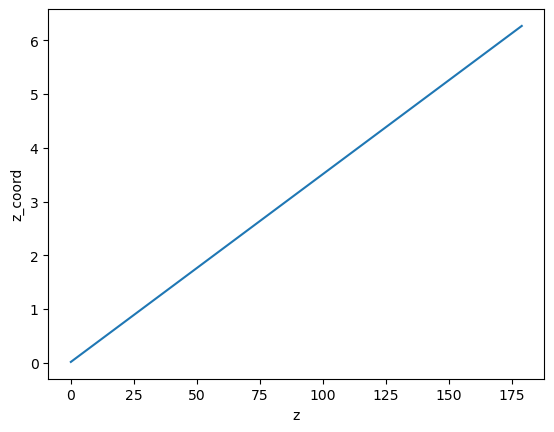

In [88]:
data.z_coord.plot()

In [ ]:
data_2d = data.dd12_3d.sel(t=0).values 
lat = data.y/np.pi*180
lat_mask = (lat >= 30) & (lat <= 150)
theta_sector = np.radians(lat[lat_mask])
data_sector = data_2d[lat_mask, :]
proton_mass = 1.6726*10**(-27)
final = data_sector.T/proton_mass*10**(-6)/(1.5e11)**2
final

array([[-525.19696547, -616.57831453],
       [-538.03127533, -619.71381881],
       [-549.40412133, -623.96535002],
       ...,
       [-870.18215154, -870.18215154],
       [-870.18215154, -870.18215154],
       [-870.18215154, -870.18215154]], shape=(512, 2))

In [86]:
data.x_coord/1e11 

<xarray.DataArray 'x_coord' (x: 512)> Size: 2kB
array([0.1519375 , 0.1566125 , 0.1612875 , 0.1659625 , 0.1706375 ,
       0.1753125 , 0.1799875 , 0.1846625 , 0.1893375 , 0.19401251,
       0.19868751, 0.20336251, 0.20803751, 0.21271251, 0.2173875 ,
       0.22206251, 0.2267375 , 0.2314125 , 0.2360875 , 0.2407625 ,
       0.2454375 , 0.2501125 , 0.2547875 , 0.2594625 , 0.2641375 ,
       0.2688125 , 0.2734875 , 0.2781625 , 0.2828375 , 0.2875125 ,
       0.2921875 , 0.2968625 , 0.3015375 , 0.3062125 , 0.31088752,
       0.31556252, 0.32023752, 0.3249125 , 0.32958752, 0.3342625 ,
       0.33893752, 0.3436125 , 0.34828752, 0.35296252, 0.3576375 ,
       0.3623125 , 0.36698753, 0.37166253, 0.3763375 , 0.3810125 ,
       0.38568753, 0.3903625 , 0.3950375 , 0.3997125 , 0.40438753,
       0.4090625 , 0.4137375 , 0.4184125 , 0.4230875 , 0.42776248,
       0.4324375 , 0.4371125 , 0.4417875 , 0.44646248, 0.4511375 ,
       0.4558125 , 0.4604875 , 0.4651625 , 0.46983752, 0.47451252,
       0.47918752, 0.4838625 , 0.48853752, 0.49321252, 0.49788752,
       0.5025625 , 0.5072375 , 0.5119125 , 0.51658756, 0.5212625 ,
       0.5259375 , 0.5306125 , 0.5352875 , 0.53996253, 0.5446375 ,
       0.54931253, 0.5539875 , 0.5586625 , 0.5633375 , 0.56801254,
       0.5726875 , 0.5773625 , 0.5820375 , 0.58671254, 0.5913875 ,
       0.5960625 , 0.6007375 , 0.60541254, 0.6100875 , 0.6147625 ,
...
       2.0920625 , 2.0967376 , 2.1014125 , 2.1060874 , 2.1107626 ,
       2.1154375 , 2.1201127 , 2.1247876 , 2.1294627 , 2.1341376 ,
       2.1388125 , 2.1434875 , 2.1481624 , 2.1528375 , 2.1575124 ,
       2.1621876 , 2.1668625 , 2.1715376 , 2.1762125 , 2.1808875 ,
       2.1855626 , 2.1902375 , 2.1949127 , 2.1995876 , 2.2042625 ,
       2.2089376 , 2.2136126 , 2.2182875 , 2.2229624 , 2.2276375 ,
       2.2323124 , 2.2369876 , 2.2416625 , 2.2463377 , 2.2510126 ,
       2.2556875 , 2.2603626 , 2.2650375 , 2.2697127 , 2.2743876 ,
       2.2790625 , 2.2837377 , 2.2884126 , 2.2930875 , 2.2977624 ,
       2.3024375 , 2.3071125 , 2.3117876 , 2.3164625 , 2.3211377 ,
       2.3258126 , 2.3304875 , 2.3351626 , 2.3398376 , 2.3445127 ,
       2.3491876 , 2.3538625 , 2.3585374 , 2.3632126 , 2.3678875 ,
       2.3725624 , 2.3772376 , 2.3819125 , 2.3865876 , 2.3912625 ,
       2.3959374 , 2.4006126 , 2.4052875 , 2.4099627 , 2.4146376 ,
       2.4193127 , 2.4239876 , 2.4286625 , 2.4333375 , 2.4380126 ,
       2.4426875 , 2.4473624 , 2.4520376 , 2.4567125 , 2.4613876 ,
       2.4660625 , 2.4707375 , 2.4754126 , 2.4800875 , 2.4847627 ,
       2.4894376 , 2.4941127 , 2.4987876 , 2.5034626 , 2.5081375 ,
       2.5128124 , 2.5174875 , 2.5221624 , 2.5268376 , 2.5315125 ,
       2.5361876 , 2.5408626 ], dtype=float32)
Dimensions without coordinates: x

In [70]:
data.dd12_3d.sel(t=120).values

array([[-27302, -27572, -27860, ..., -32743, -32744, -32744],
       [-27313, -27584, -27871, ..., -32743, -32744, -32744],
       [-27309, -27582, -27874, ..., -32740, -32743, -32745],
       ...,
       [-10300, -14654, -17024, ..., -32754, -32754, -32754],
       [-22617, -22318, -22547, ..., -32753, -32753, -32753],
       [-26506, -25749, -25035, ..., -32751, -32751, -32751]],
      shape=(60, 512), dtype=int16)

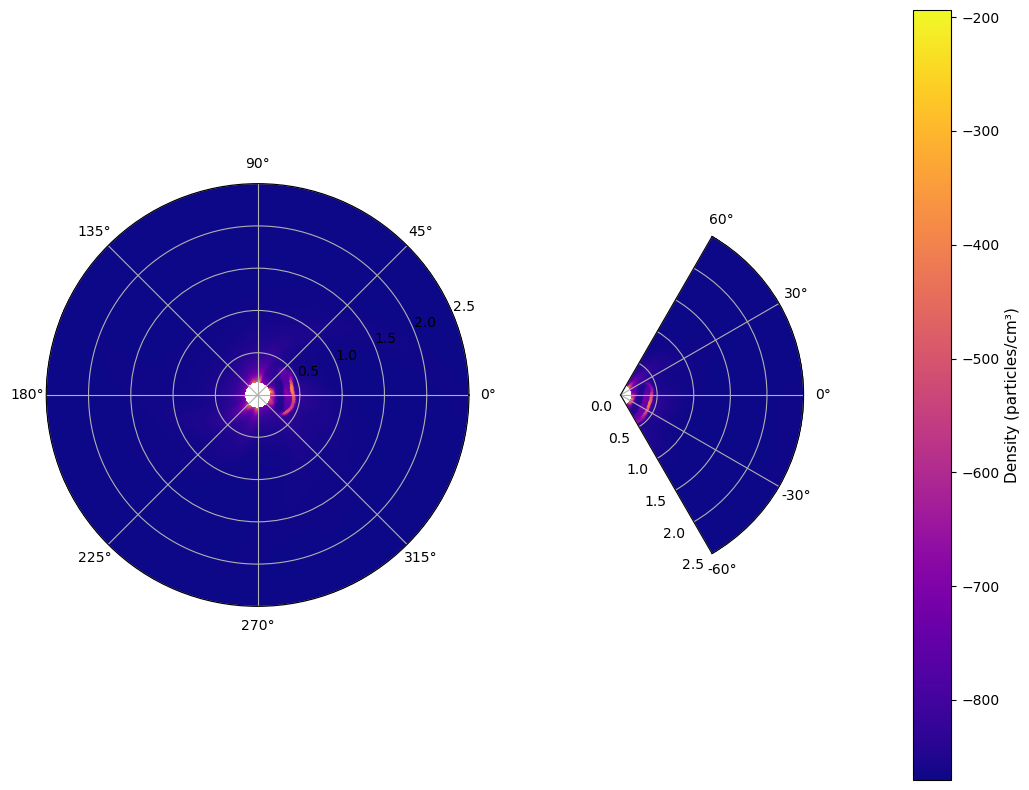

In [ ]:

# ============================================================================
# SIMPLE EXAMPLE - Just the essentials
# ============================================================================

# Assuming you have already loaded your data:
# data_2d: 2D array of dd12_3d values (shape: latitude x radius)
# r: radial distances in AU
# lat: heliographic latitudes in degrees

# For this example, create sample data
r = data.x_coord/1e11      # Radial distance: 0.1 to 2.5 AU
init= 30
lon = data.z_coord-np.pi     # Latitude: -90 to +90 degrees
R, LON = np.meshgrid(r, lon)

lat = data.y_coord-np.pi/2     # Latitude: -90 to +90 degrees


data11 = data.dd13_3d.sel(t=init).values/proton_mass*10**(-6)/(1.5e11)**2  # Example slice

proton_mass = 1.6726*10**(-27)
data12 = data.dd12_3d.sel(t=init).values/proton_mass*10**(-6)/(1.5e11)**2  # Example slice
##??????? Incorrect units??###

# ax.plot(data.Earth_TIME[8613:]/86400, data.Earth_Density[8613:]/proton_mass*10**(-6))

# ============================================================================
# METHOD 2: Partial Pie Chart (Sector view)
# ============================================================================

fig2 = plt.figure(figsize=(12, 10))
ax1 = fig2.add_subplot(121, projection='polar')

lat_mask = (lat >= -60) & (lat <= 60)
theta_sector = np.radians(lat[lat_mask])
data_sector = data_2d[lat_mask, :]

pcm2 = ax1.pcolormesh(LON, R, data11 , cmap='plasma',shading='auto')
ax1.set_theta_zero_location('E')
ax1.set_theta_direction(1)
ax1.set_ylim(0, 2.5)

# ax1.set_ylabel('Distance from Sun (AU)', labelpad=30)
R, LAT = np.meshgrid(r, lat)
ax2 = fig2.add_subplot(122, projection='polar')

pcm2 = ax2.pcolormesh(LAT, R, data12 , cmap='plasma',shading='auto')


ax2.set_theta_zero_location('E')
ax2.set_theta_direction(1)
ax2.set_ylim(0, 2.5)
ax2.set_thetamin(-60)  # Set angular limits
ax2.set_thetamax(60)

cbar2 = plt.colorbar(pcm2, ax=ax2, pad=0.1)
cbar2.set_label('Density (particles/cm³)', fontsize=11)


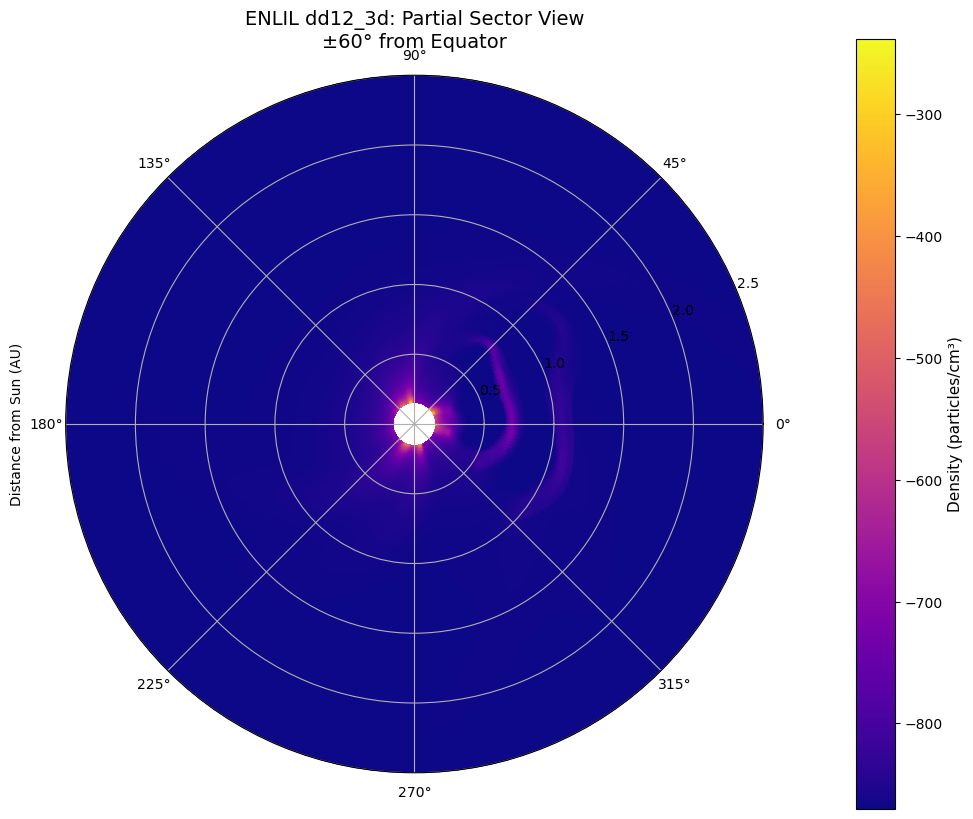

In [96]:
# For this example, create sample data
r = data.x_coord/1e11      # Radial distance: 0.1 to 2.5 AU
lat = data.z_coord-np.pi     # Latitude: -90 to +90 degrees

# Create meshgrid
R, LAT = np.meshgrid(r, lat)
proton_mass = 1.6726*10**(-27)
# Sample data: density decreases with distance, varies with latitude
data12 = data.dd13_3d.sel(t=60).values/proton_mass*10**(-6)/(1.5e11)**2  # Example slice

# ax.plot(data.Earth_TIME[8613:]/86400, data.Earth_Density[8613:]/proton_mass*10**(-6))

# ============================================================================
# METHOD 2: Partial Pie Chart (Sector view)
# ============================================================================

fig2 = plt.figure(figsize=(12, 10))
ax2 = fig2.add_subplot(111, projection='polar')

pcm2 = ax2.pcolormesh(LAT, R, data12 , cmap='plasma',shading='auto')

ax2.set_theta_zero_location('E')
ax2.set_theta_direction(1)
ax2.set_ylim(0, 2.5)
# ax2.set_thetamin(-60)  # Set angular limits
# ax2.set_thetamax(60)
ax2.set_ylabel('Distance from Sun (AU)', labelpad=30)
ax2.set_title('ENLIL dd12_3d: Partial Sector View\n±60° from Equator', 
              pad=20, fontsize=14)

cbar2 = plt.colorbar(pcm2, ax=ax2, pad=0.1)
cbar2.set_label('Density (particles/cm³)', fontsize=11)
